In [2]:
import pandas as pd
# Load each dataset
cab_data = pd.read_csv("C:/Users/apurw/OneDrive/Documents/Data Glacier/Week 2/Data/Cab_Data.csv")
customer_id = pd.read_csv("C:/Users/apurw/OneDrive/Documents/Data Glacier/Week 2/Data/Customer_ID.csv")
transaction_id = pd.read_csv("C:/Users/apurw/OneDrive/Documents/Data Glacier/Week 2/Data/Transaction_ID.csv")
city_data = pd.read_csv("C:/Users/apurw/OneDrive/Documents/Data Glacier/Week 2/Data/City.csv")

In [3]:
# Step 1: Join Cab Data with Transaction Data
cab_with_transaction = pd.merge(cab_data, transaction_id, on='Transaction ID', how='inner')

# Step 2: Join the Resulting Data with Customer Data
cab_with_transaction_customer = pd.merge(cab_with_transaction, customer_id, on='Customer ID', how='inner')

# Step 3: Join the Combined Data with City Data
complete_data = pd.merge(cab_with_transaction_customer, city_data, on='City', how='inner')

# Display the first few rows of the complete dataset
print(complete_data.head())

   Transaction ID  Date of Travel     Company        City  KM Travelled  \
0        10000011           42377    Pink Cab  ATLANTA GA         30.45   
1        10351127           43302  Yellow Cab  ATLANTA GA         26.19   
2        10412921           43427  Yellow Cab  ATLANTA GA         42.55   
3        10000012           42375    Pink Cab  ATLANTA GA         28.62   
4        10320494           43211  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  \
0         370.95      313.6350        29290         Card   Male   28   
1         598.70      317.4228        29290         Cash   Male   28   
2         792.05      597.4020        29290         Card   Male   28   
3         358.52      334.8540        27703         Card   Male   27   
4         721.10      467.1192        27703         Card   Male   27   

   Income (USD/Month) Population     Users  
0               10813   814,885    24,701   
1               10813   81

In [4]:
# Ensure the data is clean and explore basic information
complete_data.info()  # Check data types and null values
complete_data.describe()  # Get summary statistics

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ MB


,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


In [6]:
# Check for null values in the complete_data dataset
null_values = complete_data.isnull().sum()

print("Null values in Complete Data:")
print(null_values)


Null values in Complete Data:
Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
Month                 0
dtype: int64


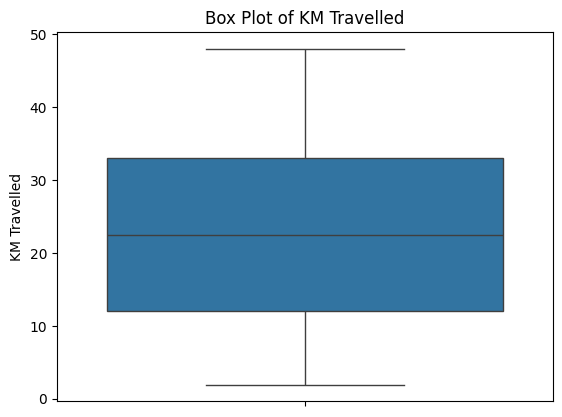

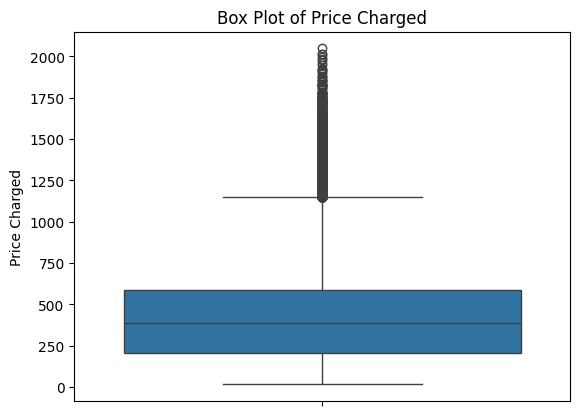

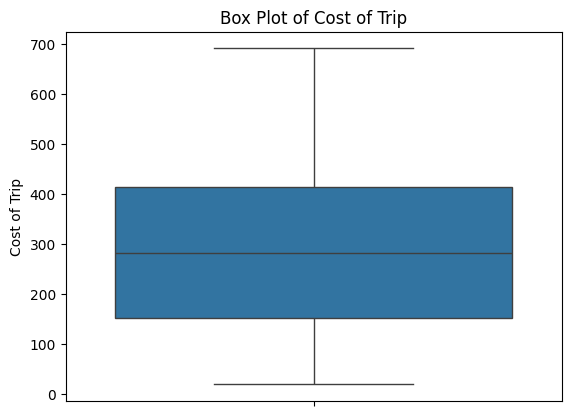

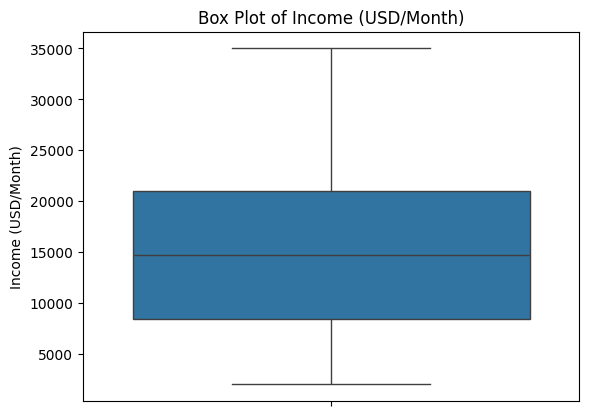

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numeric columns to check for outliers in complete_data
numeric_columns = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Income (USD/Month)']

# Create box plots for each numeric column to visualize outliers
for col in numeric_columns:
    sns.boxplot(data=complete_data, y=col)
    plt.title(f"Box Plot of {col}")
    plt.show()


In [11]:
# Define outlier boundaries using IQR for complete_data
Q1 = complete_data[numeric_columns].quantile(0.25)
Q3 = complete_data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers based on a 1.5 IQR multiplier
cleaned_data = complete_data[
    ~((complete_data[numeric_columns] < (Q1 - 1.5 * IQR)) | 
      (complete_data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
]

print("Rows in complete_data before outlier removal:", len(complete_data))
print("Rows in complete_data after outlier removal:", len(outlier_filtered_complete_data))


Rows in complete_data before outlier removal: 359392
Rows in complete_data after outlier removal: 353434


C:\Users\apurw\AppData\Local\Temp\ipykernel_41604\3321150050.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Month'] = cleaned_data['Date of Travel'].dt.month


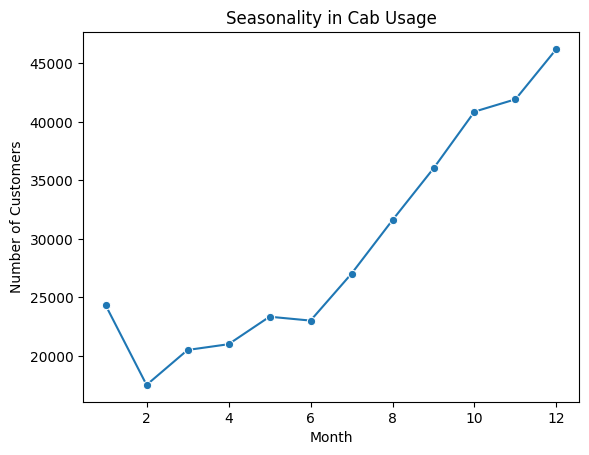

In [19]:
#Hypothesis 1: Seasonality in Cab Usage
#"Is there any seasonality in the number of customers using cab services throughout the year?"
# Extract month from 'Date of Travel' and analyze seasonality
cleaned_data['Month'] = cleaned_data['Date of Travel'].dt.month

# Group by month to examine seasonality
seasonal_trend = cleaned_data.groupby('Month')['Customer ID'].count()

# Visualize the seasonality
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=seasonal_trend, marker='o')
plt.title('Seasonality in Cab Usage')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.show()


Observations:
General Trend: The number of customers generally increases over the year, with a steep rise starting from around July.
Initial Drop: There's a notable drop from January to February, after which the trend is generally upward.
Rapid Increase: From July onwards, the number of customers increases significantly, reaching its peak in December.

Interpretation:
The overall increasing trend could suggest that cab services are more in demand as the year progresses, possibly due to various factors such as weather, holidays, or events.
The initial drop in February could indicate a seasonal dip, possibly related to post-holiday trends or weather conditions.
The rapid increase from July to December suggests that cab usage is strongly influenced by events or holidays in the latter part of the year.

Implications:
For Cab Companies: The significant increase in cab usage from mid-year to the end of the year indicates a high-demand period. Companies might plan marketing campaigns, additional services, or promotions to capitalize on this trend.
Service Adjustments: The initial drop in cab usage might require adjustments in service provision, pricing, or promotions to maintain customer engagement during this period.
Resource Planning: The seasonality observed can guide resource planning, staffing, and inventory management to meet fluctuating customer demand throughout the year.

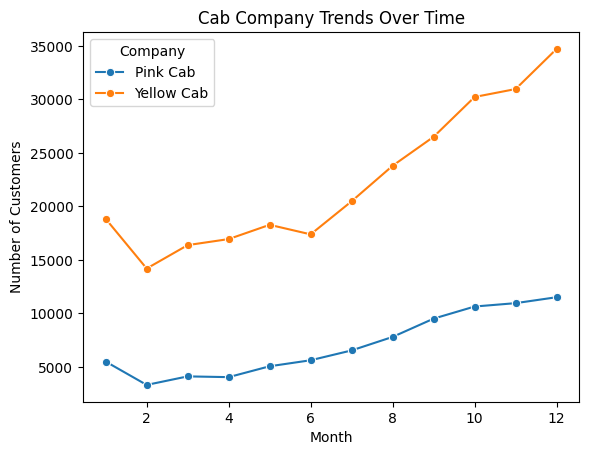

In [26]:
#Hypothesis 2: Cab Company Preference
#"Which cab company has the most users in a specific time period, and does this trend change over time?
# Group by company and month to examine trends
company_trend = cleaned_data.groupby(['Company', 'Month'])['Customer ID'].count().reset_index()

# Visualize the trends
sns.lineplot(data=company_trend, x='Month', y='Customer ID', hue='Company', marker='o')
plt.title('Cab Company Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.legend(title='Company')
plt.show()


Observations:
Yellow Cab's Growth: Yellow Cab shows a steady increase in the number of customers over the year. It starts at around 20,000 customers and ends with over 35,000 customers.
Pink Cab's Consistency: Pink Cab has a slower, more gradual increase in the number of customers, starting at around 5,000 and reaching approximately 15,000 customers by the end of the year.
Divergent Trends: Yellow Cab demonstrates a sharp upward trend from around the middle of the year, whereas Pink Cab's growth is more stable.

Interpretation:
The strong growth trend for Yellow Cab suggests an increasing preference among customers. This may be due to marketing efforts, service quality, or customer loyalty.
Pink Cab's slower growth indicates consistent but less dramatic customer acquisition. This could mean a smaller market presence or a lack of aggressive growth strategies.
The divergent trends highlight that Yellow Cab has captured more customers over the year, suggesting effective business strategies or customer satisfaction.

Implications:
For Yellow Cab: The upward trend indicates success in gaining market share and attracting more customers. This growth could be further leveraged by maintaining or enhancing customer satisfaction and expanding marketing efforts.
For Pink Cab: The gradual growth implies a steady market presence, but there may be room for more aggressive strategies to compete with Yellow Cab's growth. Pink Cab could focus on differentiating factors to attract more customers.

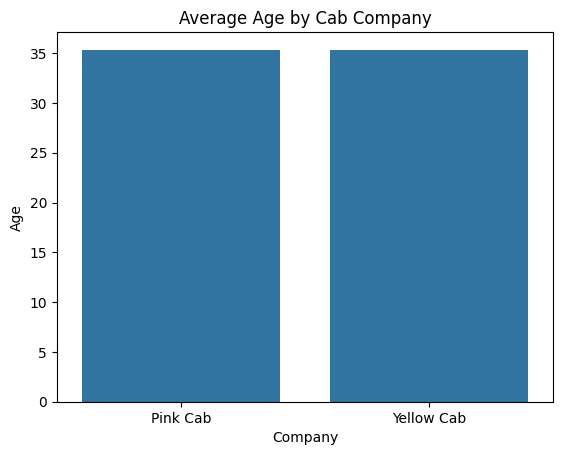

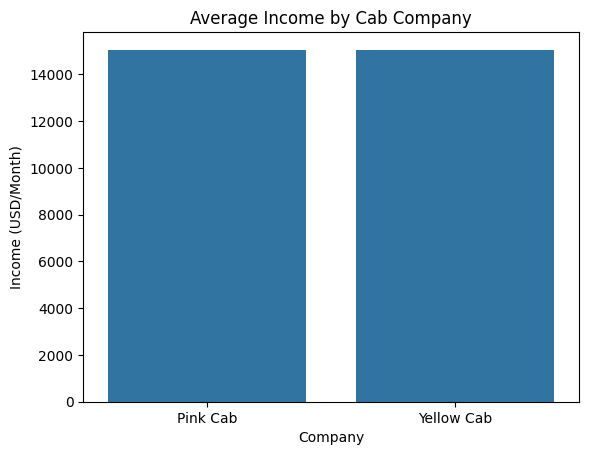

In [17]:
#Hypothesis 3: Customer Demographics
#"Do customer demographics like age and income influence the choice of cab company?"
# Group by company and calculate statistics for age and income
demographics_trend = cleaned_data.groupby('Company').agg({
    'Age': 'mean',
    'Income (USD/Month)': 'mean'
}).reset_index()

# Compare age and income across cab companies
sns.barplot(data=demographics_trend, x='Company', y='Age')
plt.title('Average Age by Cab Company')
plt.show()

sns.barplot(data=demographics_trend, x='Company', y='Income (USD/Month)')
plt.title('Average Income by Cab Company')
plt.show()


Chart 1: Average Age by Cab Company

Observation: The bar chart shows the average age of customers for Pink Cab and Yellow Cab. The average age for both companies is approximately 35 years.

Interpretation: This similarity suggests that both cab companies attract customers with comparable age profiles. The lack of significant difference might indicate that age isn't a major factor influencing customer preference between these two companies.

Implications: If age isn't a differentiator, both companies might focus on other factors like service quality or pricing to attract customers.

Chart 2: Average Income by Cab Company

Observation: The bar chart shows the average income of customers for Pink Cab and Yellow Cab. Both companies have a similar average income of around 14,000 USD per month.

Interpretation: This similarity suggests that customers from similar income brackets use both cab companies. It implies that income might not be a significant factor in choosing between Pink Cab and Yellow Cab.

Implications: Since income doesn't appear to be a differentiating factor, both companies might look at other customer preferences, such as travel distance or customer service, to gain a competitive edge.

Overall Implications
These charts indicate that age and income are relatively consistent across both cab companies, suggesting other factors are driving customer choice. This could be related to pricing, travel distance, customer service, or company loyalty programs. Both companies might need to explore additional customer preferences to improve their market position.

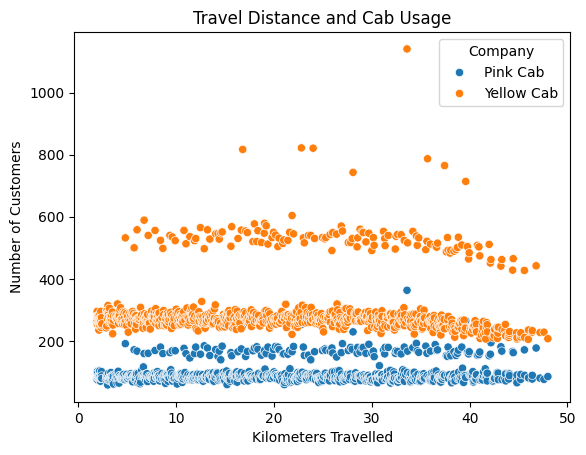

In [23]:
#Hypothesis 4: Cab Usage and Travel Distance
#"Does travel distance impact cab usage trends or company preference?"

# Analyze travel distance trends by company
distance_trend = cleaned_data.groupby(['Company', 'KM Travelled']).agg({
    'Customer ID': 'count',
}).reset_index()

# Scatter plot to visualize travel distance trends by company
sns.scatterplot(data=distance_trend, x='KM Travelled', y='Customer ID', hue='Company')
plt.title('Travel Distance and Cab Usage')
plt.xlabel('Kilometers Travelled')
plt.ylabel('Number of Customers')
plt.show()




Observations:
Travel Distance: The scatter plot ranges from 0 to approximately 50 kilometers in travel distance.
Number of Customers: The y-axis shows a wide range in customer counts, with some clusters indicating a high number of customers at certain distances.
Company Preference: Yellow Cab has a consistently higher customer count across various distances, while Pink Cab has fewer customers at each distance level.

Interpretation:
Yellow Cab seems to attract more customers across a broader range of travel distances. This could suggest that Yellow Cab has a more flexible or appealing service offering for longer trips.
Pink Cab's lower customer counts across the range could indicate that it's more focused on shorter trips or less competitive in longer-distance markets.
The scatter plot reveals that both companies have a variety of trip lengths, with Yellow Cab generally attracting more customers, particularly for longer distances.

Implications:
For Pink Cab: This company might consider expanding its service range or offering more flexible pricing for longer trips to increase its customer base across various distances.
For Yellow Cab: The data suggests that Yellow Cab has a broader market appeal, particularly for longer trips. This could indicate effective marketing or customer preferences for this company over longer distances.

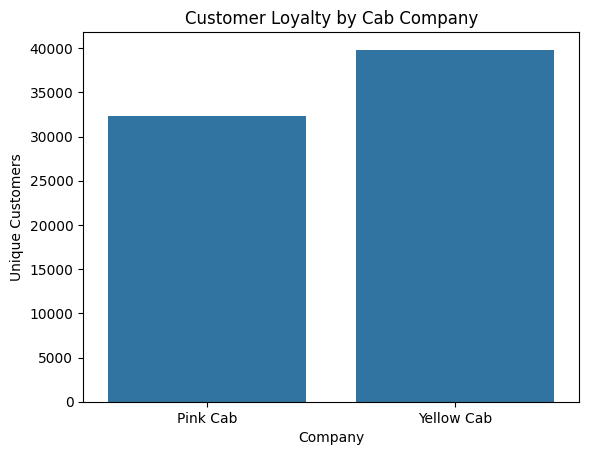

In [21]:
#Hypothesis 5: Customer Loyalty
#"Do certain cab companies have higher customer loyalty based on repeat customers or frequent usage?"

# Find unique customers per company to gauge customer loyalty
loyalty_trend = cleaned_data.groupby('Company')['Customer ID'].nunique()

# Bar plot to visualize customer loyalty by company
sns.barplot(x=loyalty_trend.index, y=loyalty_trend.values)
plt.title('Customer Loyalty by Cab Company')
plt.xlabel('Company')
plt.ylabel('Unique Customers')
plt.show()


Observations:
Yellow Cab's Customer Base: Yellow Cab has a higher count of unique customers, indicating a larger customer base.
Pink Cab's Customer Base: Pink Cab has fewer unique customers compared to Yellow Cab.

Interpretation:
A higher number of unique customers can suggest that a company has better customer loyalty or attracts more repeat customers.
Yellow Cab's larger base of unique customers might reflect a broader market presence, more appealing services, or stronger customer retention strategies.
Pink Cab's relatively smaller base could indicate a need for improved marketing or loyalty programs to increase customer retention and loyalty.

Implications:
For Yellow Cab: The company appears to have a strong customer base and might be benefiting from effective customer retention or loyalty programs.
For Pink Cab: This company might need to invest in strategies that promote customer loyalty, such as loyalty programs, personalized services, or targeted marketing to retain and attract more unique customers.

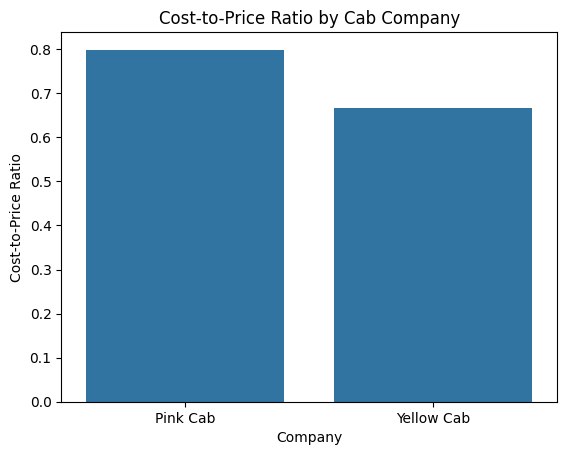

In [22]:
#Hypothesis 6: Cost-Efficiency Analysis
#"Does one cab company have a better cost-to-price ratio compared to the other, indicating greater cost-efficiency?"

# Calculate cost-to-price ratio for each company
cost_efficiency_trend = cleaned_data.groupby('Company').agg({
    'Cost of Trip': 'sum',
    'Price Charged': 'sum'
}).reset_index()

cost_efficiency_trend['Cost-to-Price Ratio'] = cost_efficiency_trend['Cost of Trip'] / cost_efficiency_trend['Price Charged']

# Bar plot to visualize cost-to-price ratio by company
sns.barplot(data=cost_efficiency_trend, x='Company', y='Cost-to-Price Ratio')
plt.title('Cost-to-Price Ratio by Cab Company')
plt.xlabel('Company')
plt.ylabel('Cost-to-Price Ratio')
plt.show()


Observations:
Pink Cab's Cost-to-Price Ratio: The cost-to-price ratio for Pink Cab is approximately 0.8, indicating that the cost of providing the service is 80% of the price charged to customers.
Yellow Cab's Cost-to-Price Ratio: Yellow Cab has a lower cost-to-price ratio, around 0.7, suggesting a lower cost proportion relative to its price charged.

Interpretation:
A lower cost-to-price ratio indicates higher cost-efficiency, as it suggests that the cab company can generate a higher margin from its trips.
In this comparison, Yellow Cab seems more cost-efficient than Pink Cab, potentially leading to higher profitability.
Pink Cab's higher cost-to-price ratio could imply that it's spending more on trip costs or is less efficient in its operations.

Implications:
For Pink Cab: The company might need to assess its operational costs and explore ways to improve efficiency to reduce the cost-to-price ratio.
For Yellow Cab: The company appears to be operating more cost-efficiently, suggesting that it's better positioned to offer competitive pricing or generate higher margins.

C:\Users\apurw\AppData\Local\Temp\ipykernel_41604\4035628495.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Income Group'] = pd.cut(cleaned_data['Income (USD/Month)'], bins=5)


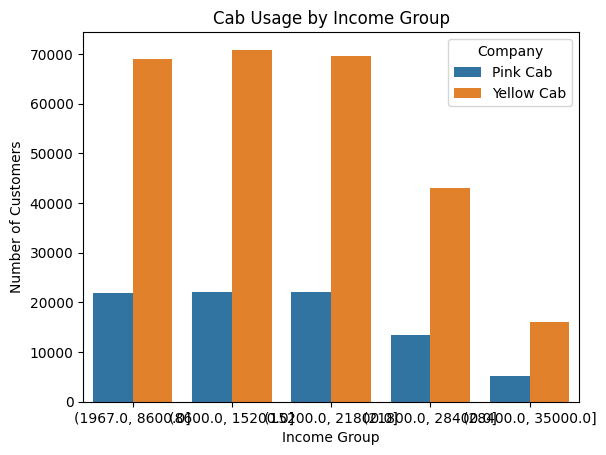

In [24]:
#Hypothesis 7: Impact of Income on Cab Usage
#"Does income level affect cab usage, and is there a preference for specific companies based on income?"

# Create income groups to examine trends by income level
cleaned_data['Income Group'] = pd.cut(cleaned_data['Income (USD/Month)'], bins=5)

# Group by income group and company to understand income trends
income_trend = cleaned_data.groupby(['Income Group', 'Company'])['Customer ID'].count().reset_index()

# Visualize the income trends across cab companies
sns.barplot(data=income_trend, x='Income Group', y='Customer ID', hue='Company')
plt.title('Cab Usage by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Number of Customers')
plt.show()



The bar chart depicts cab usage by income group for two cab companies, "Pink Cab" and "Yellow Cab." The x-axis represents the income groups, while the y-axis shows the number of customers. 

Observations:
Income Groups: The income groups are divided into five segments, ranging from approximately 1,967 USD/month to 35,000 USD/month.
Yellow Cab's Dominance: Across all income groups, Yellow Cab has a higher number of customers compared to Pink Cab.
Pink Cab's Consistency: Pink Cab has a relatively steady number of customers across income groups, with a slight increase in the higher income group.
Yellow Cab's Variance: Yellow Cab has a consistent number of customers in the first three income groups, with a notable decline in the higher income groups.

Interpretation:
Yellow Cab appears to have a broader customer base across income groups, suggesting a wider appeal.
Pink Cab's customer count remains relatively stable across income groups, indicating a consistent customer base.
The noticeable drop in Yellow Cab's customer count in the highest income group might suggest that this segment has different preferences, or that Yellow Cab's offerings might not align with the expectations of higher-income customers.

C:\Users\apurw\AppData\Local\Temp\ipykernel_41604\2554622764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Age Group'] = pd.cut(cleaned_data['Age'], bins=[0, 25, 35, 50, 65, 100], labels=['0-25', '26-35', '36-50', '51-65', '66+'])


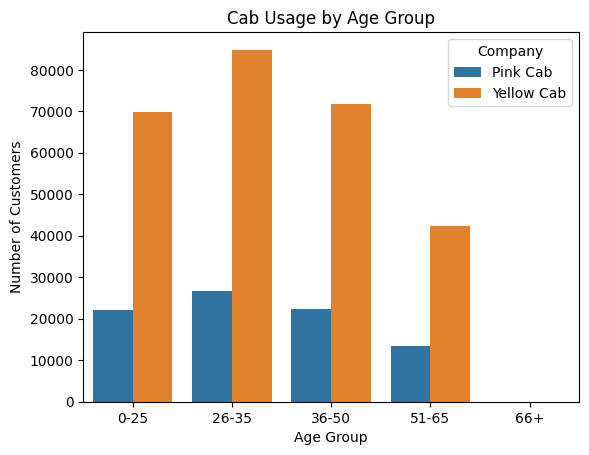

In [25]:
#Hypothesis 8: Impact of Age on Cab Usage
#"Do cab usage patterns vary with customer age, and is there a correlation between age and company preference?"

import seaborn as sns
import matplotlib.pyplot as plt

# Create age groups to examine trends by age
cleaned_data['Age Group'] = pd.cut(cleaned_data['Age'], bins=[0, 25, 35, 50, 65, 100], labels=['0-25', '26-35', '36-50', '51-65', '66+'])

# Group by age group and company to understand age trends
age_trend = cleaned_data.groupby(['Age Group', 'Company'])['Customer ID'].count().reset_index()

# Visualize the age trends across cab companies
sns.barplot(data=age_trend, x='Age Group', y='Customer ID', hue='Company')
plt.title('Cab Usage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()


Observations:
26-35 Age Group: This age group has the highest number of customers, with Yellow Cab showing a significantly larger customer base compared to Pink Cab.
0-25 and 36-50 Age Groups: These age groups also have a notable customer base, with Yellow Cab leading in both.
51-65 Age Group: There's a significant drop in the number of customers for both companies, with Yellow Cab still leading.
66+ Age Group: This group has the fewest customers, with both companies showing a similar, low level of usage.

Interpretation:
Yellow Cab generally has a larger customer base across all age groups, particularly in the 26-35 and 36-50 age ranges.
Pink Cab has a smaller market share in each age group, suggesting potential areas for improvement in marketing or service targeting these segments.
The drop in customers among the older age groups might indicate that these groups have different transportation preferences or lesser cab usage in general.

Recommendations

Recommendation 1: Launch Seasonal Marketing Campaigns
Given the strong seasonal trend in cab usage, with significant growth from mid-year to the end of the year, you can consider creating marketing campaigns that align with this pattern. You might:

Introduce promotions or discounts during high-demand months (from July to December) to draw more customers.
Plan events or collaborations with other businesses to take advantage of holiday seasons and other key events during these months.
Recommendation 2: Emulate Yellow Cab's Successful Practices
Yellow Cab shows higher customer loyalty, a better cost-to-price ratio, and a broader appeal across various age and income groups. To achieve similar success, consider:

Investigating Yellow Cab's customer service methods and adopting their successful strategies into your own operations.
Focusing on cost-efficiency by streamlining expenses and optimizing operations to improve your company's cost-to-price ratio.
Recommendation 3: Boost Customer Retention for Pink Cab
Pink Cab has lower customer loyalty and a smaller customer base compared to Yellow Cab. To enhance customer retention and grow your base, you might:

Introduce loyalty programs or incentives to encourage repeat customers and enhance customer satisfaction.
Increase marketing efforts to reach and attract untapped demographics to grow your customer base.
Recommendation 4: Address Customer Demographics
The demographic analysis indicates that customer profiles by age and income are similar across both cab companies. To broaden your appeal, consider:

Offering personalized services or promotions that cater to different age groups or income levels.
Developing targeted marketing campaigns that emphasize the benefits for specific demographic groups.
Recommendation 5: Optimize Resource Planning and Operations
The varying customer demand throughout the year suggests that effective resource planning and operational flexibility are key. Consider these steps to improve operations:

Adjust staffing and resource levels to meet fluctuating demand, reducing costs during slow periods and ensuring sufficient capacity during peak times.
Implement flexible pricing strategies to maintain steady business during off-peak months.
Recommendation 6: Focus on Longer Travel Distances
The scatter plot on travel distance and cab usage indicates a trend where Yellow Cab is preferred for longer trips. To tap into this market, you could:

Offer special rates for longer trips or create packages to encourage customers to use your service for longer distances.
Expand your service area or provide additional amenities for longer trips to attract more customers.

